In [20]:
# Importa la biblioteca pandas con el alias pd, que se usa para manipulación de datos en estructuras tipo DataFrame.
import pandas as pd

# Importa la biblioteca numpy con el alias np, que se usa para operaciones numéricas avanzadas (aunque en este fragmento no se utiliza).
import numpy as np

# Lee el archivo 'grd_2023.csv' usando como delimitador el símbolo '|' y lo guarda en un DataFrame llamado grd.
grd = pd.read_csv('grd_2023.csv', delimiter='|')

# Muestra las primeras 5 filas del DataFrame grd para una vista preliminar de los datos.
grd.head()

# Lee el archivo 'hospitales.csv', sin encabezado (header=None), y con '|' como delimitador. Guarda el resultado en un DataFrame llamado hospitales.
hospitales = pd.read_csv('hospitales.csv', header=None, delimiter="|")

# Muestra las primeras 5 filas del DataFrame hospitales.
hospitales.head()

# Lee el archivo 'ir-GRD.csv', sin encabezado (header=None), usando '|' como delimitador, y lo guarda en el DataFrame ir.
ir = pd.read_csv('ir-GRD.csv', delimiter='|', header = None)

# Muestra el contenido completo del DataFrame ir.
ir
# Realiza una combinación (merge) entre los DataFrames grd y hospitales. 
# Se usa 'COD_HOSPITAL' de grd y la columna 0 de hospitales para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, lo que significa que todos los registros de grd estarán en el resultado.
grd_h = pd.merge(grd, hospitales, left_on='COD_HOSPITAL', right_on=0, how='left')

# Elimina la columna 0 del DataFrame resultante, que es la que se utilizó para la combinación y que ya no es necesaria.
grd_h = grd_h.drop(columns=0)

# Renombra la columna 1 del DataFrame resultante a 'NOMBRE_HOSPITAL' para que tenga un nombre más descriptivo.
grd_h = grd_h.rename(columns={1: 'NOMBRE_HOSPITAL'})

# Renombra la columna 'FECHAALTA' a 'FECHA_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"FECHAALTA": 'FECHA_ALTA'})

# Renombra la columna 'TIPOALTA' a 'TIPO_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"TIPOALTA": 'TIPO_ALTA'})

# Muestra las primeras 5 filas del DataFrame grd_h para revisar el resultado de las transformaciones.
grd_h.head()


,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,NOMBRE_HOSPITAL
0,122100,72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,64161.0,0.7094,1.0,1.0,43.0,2,Hospital Clínico Regional (Valdivia)
1,114101,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,41301.0,1.0869,1.0,1.0,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...
2,114101,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,44161.0,0.4084,1.0,1.0,3.0,1,Complejo Hospitalario Dr. Sótero del Río (San...
3,106103,67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,131301.0,0.6406,1.0,1.0,45.0,1,Hospital Claudio Vicuña (San Antonio)
4,106103,100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,74131.0,0.5346,1.0,1.0,0.0,2,Hospital Claudio Vicuña (San Antonio)


In [21]:
grd_h["TIPO_INGRESO"].unique()


array(['URGENCIA', 'PROGRAMADA', 'OBSTETRICA', nan], dtype=object)

In [22]:
# Realiza una combinación (merge) entre los DataFrames grd_h y ir. 
# Se utiliza 'IR_29301_COD_GRD' de grd_h y la columna 0 de ir para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, asegurando que todos los registros de grd_h estén en el resultado.
# Después, se elimina la columna 0 de ir (que se utilizó para la combinación) y se renombra la columna 1 de ir a 'NOMBRE_IR'.
grd_f = pd.merge(grd_h, ir, left_on='IR_29301_COD_GRD', right_on=0, how='left').drop(columns=0).rename(columns={1: 'NOMBRE_IR'})

# Selecciona un subconjunto de columnas del DataFrame grd_f, asegurando que solo se mantendrán las columnas especificadas en la lista.
# Esto reordena las columnas y se asegura de que solo estén las necesarias para el análisis.
grd_f = grd_f[["NOMBRE_HOSPITAL", "SEXO", "FECHA_NACIMIENTO", 
               "TIPO_INGRESO", "TIPO_ALTA",
               "IR_29301_SEVERIDAD",
               "IR_29301_MORTALIDAD", "EDAD","DIAS_ESTANCIA"]]

# Muestra el DataFrame resultante grd_f, que ahora contiene solo las columnas seleccionadas.
grd_f

,NOMBRE_HOSPITAL,SEXO,FECHA_NACIMIENTO,TIPO_INGRESO,TIPO_ALTA,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA
0,Hospital Clínico Regional (Valdivia),HOMBRE,1980-04-13,URGENCIA,DOMICILIO,1.0,1.0,43.0,2
1,Complejo Hospitalario Dr. Sótero del Río (San...,HOMBRE,2001-11-04,URGENCIA,DOMICILIO,1.0,1.0,22.0,6
2,Complejo Hospitalario Dr. Sótero del Río (San...,HOMBRE,2020-07-30,URGENCIA,HOSPITALIZACIÓN DOMICILIARIA,1.0,1.0,3.0,1
3,Hospital Claudio Vicuña (San Antonio),MUJER,1978-11-14,PROGRAMADA,DOMICILIO,1.0,1.0,45.0,1
4,Hospital Claudio Vicuña (San Antonio),MUJER,2023-12-20,URGENCIA,DOMICILIO,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...
1039582,Hospital Dr. Antonio Tirado Lanas (Ovalle),MUJER,1995-12-06,OBSTETRICA,DOMICILIO,1.0,1.0,27.0,3
1039583,Hospital Clínico Regional Dr. Guillermo Grant...,MUJER,1991-04-26,PROGRAMADA,DOMICILIO,0.0,0.0,32.0,0
1039584,Hospital Regional de Rancagua,HOMBRE,2015-01-08,URGENCIA,DOMICILIO,1.0,1.0,9.0,2
1039585,Hospital Base San José de Osorno,HOMBRE,2014-01-07,PROGRAMADA,DOMICILIO,1.0,1.0,9.0,0


In [23]:
# Remove rows with null values
grd_f = grd_f.dropna()

# Optionally, reset the index after dropping rows
grd_f = grd_f.reset_index(drop=True)

In [24]:
grd_f["TIPO_INGRESO"] = np.where(grd_f["TIPO_INGRESO"] == "URGENCIA", 1, 0)

In [25]:
(grd_f["TIPO_INGRESO"].sum())/(grd_f.shape[0])

0.4988854714931796

Casi la mitad de todos los ingresos del dataset son por urgencias, lo cual podria ser un dato importante mas adelante.

In [26]:
grd_f["TIPO_ALTA"].unique()

array(['DOMICILIO', 'HOSPITALIZACIÓN DOMICILIARIA',
       'DERIVACIÓN INST. PRIVADA (COMPRA DE SERVICIOS',
       'DERIVACIÓN OTRO HOSPITAL DEL SERVICIO', 'FUGA DEL PACIENTE',
       'DERIVACIÓN OTRO HOSPITAL DE LA RED NACIONAL', 'ALTA VOLUNTARIA',
       'FALLECIDO', 'DERIVACIÓN A OTROS CENTROS (CÁRCEL, HOGAR DE',
       'DERIVACIÓN INST. PRIVADA (VOLUNTARIO)'], dtype=object)

In [27]:
grd_f["TIPO_ALTA"] = np.where(grd_f["TIPO_ALTA"] == "FALLECIDO", 1, 0)

In [28]:
(grd_f["TIPO_ALTA"].sum())/(grd_f.shape[0])

0.02416559478879757

Solo el 2% de los pacientes han fallecido, ahora revisaremos la variacion de esto segun su indice de mortalidad

In [29]:
# Group by 'IR_29301_MORTALIDAD' and calculate the sum and count of 'TIPO_ALTA'
grouped = grd_f.groupby("IR_29301_MORTALIDAD")["TIPO_ALTA"]

# Calculate the mean by dividing the sum by the count
result = grouped.sum() / grouped.count()

print(result)

IR_29301_MORTALIDAD
0.0    0.000031
1.0    0.001709
2.0    0.016002
3.0    0.127120
Name: TIPO_ALTA, dtype: float64


Se puede apreciar claramente que a mayor mortalidad otorgada al paciente, mayor es la tase de fallecimiento de este. ahora veremos si adicionalmente juega un papel el rango de edad de los pacientes

In [30]:
# Define the bins and labels for the age ranges
bins = [0, 5, 11, 17, 26, 59, float('inf')]
labels = ['Primera infancia', 'Infancia', 'Adolescencia', 'Juventud', 'Adultez', 'Persona mayor']

# Create a new column with the age ranges
grd_f['AGE_GROUP'] = pd.cut(grd_f['EDAD'], bins=bins, labels=labels, right=True)

print(grd_f[['EDAD', 'AGE_GROUP']])

         EDAD         AGE_GROUP
0        43.0           Adultez
1        22.0          Juventud
2         3.0  Primera infancia
3        45.0           Adultez
4         0.0               NaN
...       ...               ...
1039448  27.0           Adultez
1039449  32.0           Adultez
1039450   9.0          Infancia
1039451   9.0          Infancia
1039452  72.0     Persona mayor

[1039453 rows x 2 columns]


In [32]:
# Group by 'AGE_GROUP' and 'IR_29301_MORTALIDAD', then calculate the sum and count of 'TIPO_ALTA'
grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]

# Calculate the mean by dividing the sum by the count
result = grouped.sum() / grouped.count()

print(result)

AGE_GROUP         IR_29301_MORTALIDAD
Primera infancia  0.0                    0.000000
                  1.0                    0.000093
                  2.0                    0.001373
                  3.0                    0.005781
Infancia          0.0                    0.000000
                  1.0                    0.000049
                  2.0                    0.001150
                  3.0                    0.012495
Adolescencia      0.0                    0.000000
                  1.0                    0.000038
                  2.0                    0.002736
                  3.0                    0.037333
Juventud          0.0                    0.000000
                  1.0                    0.000227
                  2.0                    0.003973
                  3.0                    0.068842
Adultez           0.0                    0.000041
                  1.0                    0.000704
                  2.0                    0.008011
            

/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_12355/2059623976.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]


ahora revisaremos especificamente con mortalidad 3, donde se espera encontrar la mayor variabilidad

In [33]:
# Filter the DataFrame for rows where 'IR_29301_MORTALIDAD' equals 3
filtered_df = grd_f[grd_f["IR_29301_MORTALIDAD"] == 3]

# Group by 'AGE_GROUP' and calculate the sum and count of 'TIPO_ALTA'
grouped = filtered_df.groupby("AGE_GROUP")["TIPO_ALTA"]

# Calculate the mean by dividing the sum by the count
result = grouped.sum() / grouped.count()

print(result)

AGE_GROUP
Primera infancia    0.005781
Infancia            0.012495
Adolescencia        0.037333
Juventud            0.068842
Adultez             0.108323
Persona mayor       0.177786
Name: TIPO_ALTA, dtype: float64


/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_12355/302623226.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_df.groupby("AGE_GROUP")["TIPO_ALTA"]


/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_12355/3261869417.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]


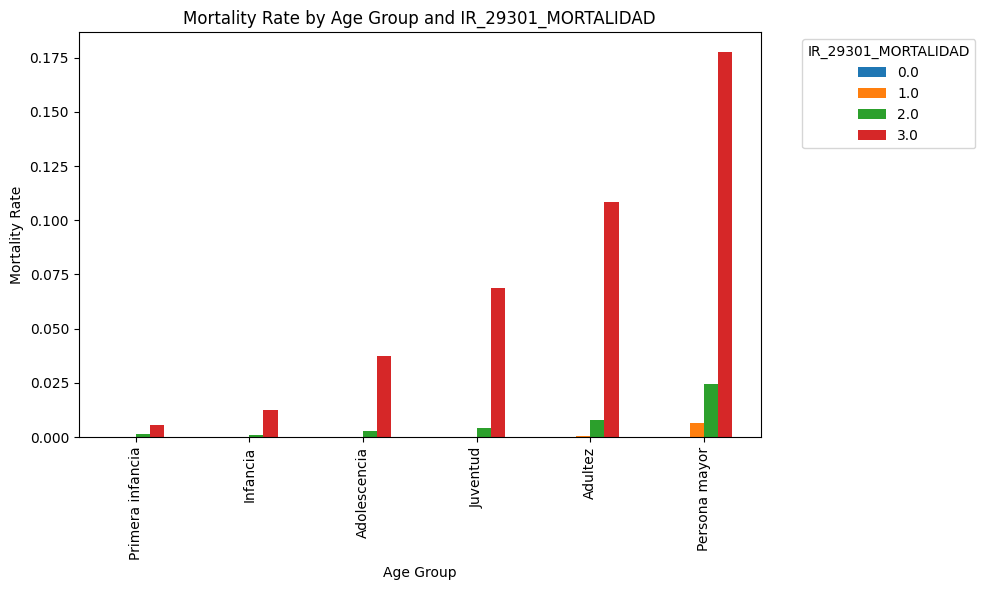

In [34]:
import matplotlib.pyplot as plt

# Group by 'AGE_GROUP' and 'IR_29301_MORTALIDAD', then calculate the mean
grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]
result = (grouped.sum() / grouped.count()).unstack()  # Unstack for better visualization

# Plot the result as a bar chart
result.plot(kind="bar", figsize=(10, 6))

# Add labels and title
plt.title("Mortality Rate by Age Group and IR_29301_MORTALIDAD")
plt.xlabel("Age Group")
plt.ylabel("Mortality Rate")
plt.legend(title="IR_29301_MORTALIDAD", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()